# Artificial Neural Network (ANN)
## Content
* [2-Layer Neural Network](#11)
   * [Import Libraries](#1)
   * [Load Dataset](#2)
   * [Preprocessing](#3)
   * [Size of layers and initializing parameters weights and bias](#12)
   * [Forward propagation](#13)
   * [Loss function and Cost function](#14)
   * [Backward propagation](#15)
   * [Update Parameters](#16)
   * [Prediction with learnt parameters weight and bias](#17)
   * [Create Model](#18)
   
* [L-Layer Neural Network](#19)
   * [Implementing with keras library](#22)

## Introduction Artifical Neural Network

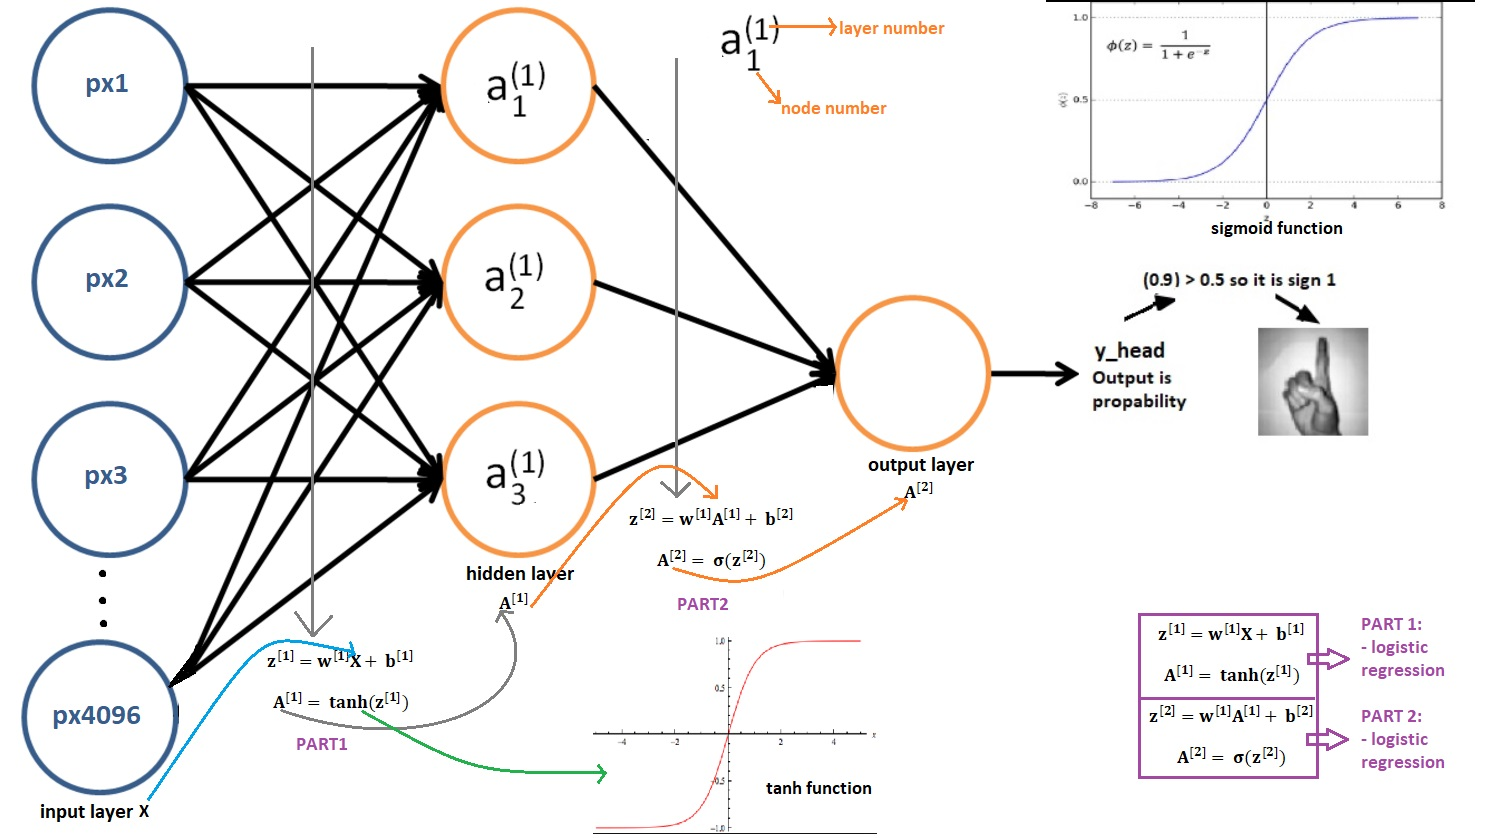

<a id="11"></a> <br>
## 2-Layer Neural Network
* Import Libraries
* Load Dataset
* Preproseccing
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learn parameters weight and bias
* Create Model

### Dataset
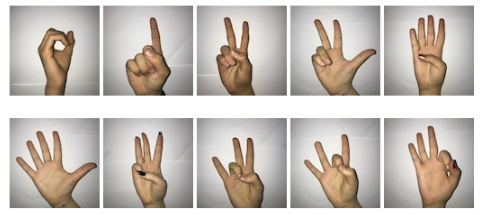
#### <b>Details of datasets:</b>
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10
* <b>Details of datasets in GitHub Repo:</b>
github.com/ardamavi/Sign-Language-Digits-Dataset


#### Overview the Data Set
* We will use "sign language digits dataset" for this tutorial.
* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity. 
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

<a id="1"></a> <br>
### a- Import Libraries

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

<a id="2"></a> <br>
### b- Load Dataset

(-0.5, 63.5, 63.5, -0.5)

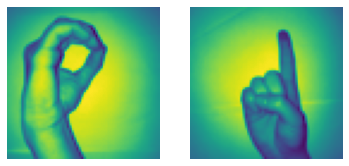

In [39]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[204].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[822].reshape(img_size, img_size))
plt.axis('off')

In [40]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 

<a id="3"></a> <br>
### c- Preproseccing

* Lets split X and Y into train and test sets.
    * test_size = percentage of test size. test = 15% and train = 75%
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [41]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).

In [42]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* As you can see, we have 348 images and each image has 4096 pixels in image train array.
* Also, we have 62 images and each image has 4096 pixels in image test array.

In [43]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


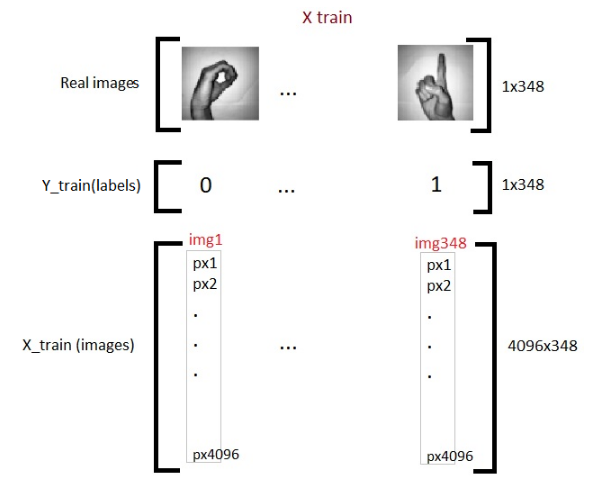

<a id="12"></a> <br>
### d- Size of layers and initializing parameters weights and bias
* For x_train that has 348 sample $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* Bias can be zero initially.

In [44]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
### e- Forward Propagation

#### Sigmoid Function

In [45]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

In [46]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)  # A2 = y_head

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

<a id="14"></a> <br>
### f- Loss function and Cost function
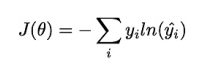

In [47]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

<a id="15"></a> <br>
### g- Backward propagation

In [48]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
### h- Update Parameters 

In [49]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
### i- Prediction with learnt parameters weight and bias

In [50]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
### j- Create Model

Cost after iteration 0: 0.379733
Cost after iteration 100: 0.359549
Cost after iteration 200: 0.349882
Cost after iteration 300: 0.346487
Cost after iteration 400: 0.345291
Cost after iteration 500: 0.344879
Cost after iteration 600: 0.344745
Cost after iteration 700: 0.344708
Cost after iteration 800: 0.344704
Cost after iteration 900: 0.344709
Cost after iteration 1000: 0.344718
Cost after iteration 1100: 0.344726
Cost after iteration 1200: 0.344733
Cost after iteration 1300: 0.344739
Cost after iteration 1400: 0.344745
Cost after iteration 1500: 0.344751
Cost after iteration 1600: 0.344755
Cost after iteration 1700: 0.344760
Cost after iteration 1800: 0.344765
Cost after iteration 1900: 0.344769
Cost after iteration 2000: 0.344773
Cost after iteration 2100: 0.344777
Cost after iteration 2200: 0.344782
Cost after iteration 2300: 0.344786
Cost after iteration 2400: 0.344791


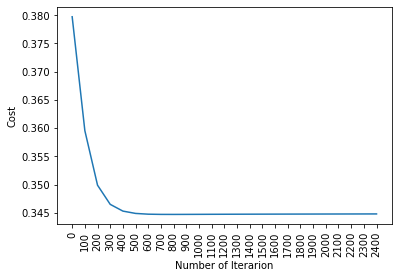

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %


In [51]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)